 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
file_path = Path("../Starter_Code/Resources/whale_returns.csv")

whale_returns = pd.read_csv(file_path)

whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)

whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Drop nulls
whale_returns_1 = whale_returns.dropna()
whale_returns_1.drop(columns= ['Date'])
whale_returns_1.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
file_path = Path("../Starter_Code/Resources/algo_returns.csv")



algo_returns = pd.read_csv(file_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head()



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_returns_1 = algo_returns.dropna()

algo_returns_1.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

<ipython-input-14-bfca993d4a5d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [15]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [17]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"S&P500"}, inplace = True)
sp500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

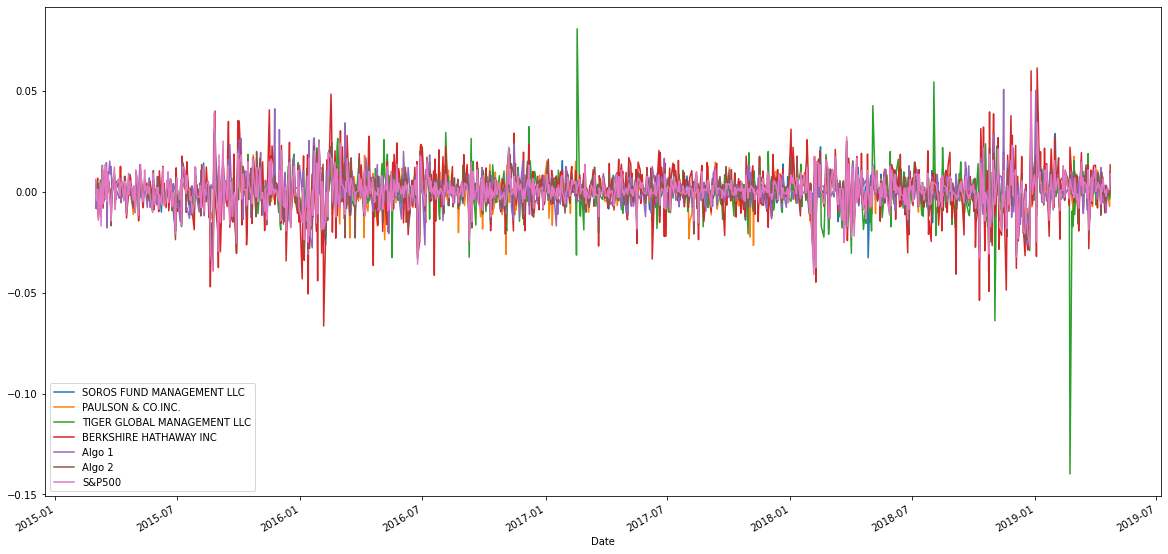

In [19]:
# Plot daily returns of all portfolios
df_combined = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")
df_combined.drop(columns= ['Date'], inplace=True)
df_combined.plot(figsize= (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

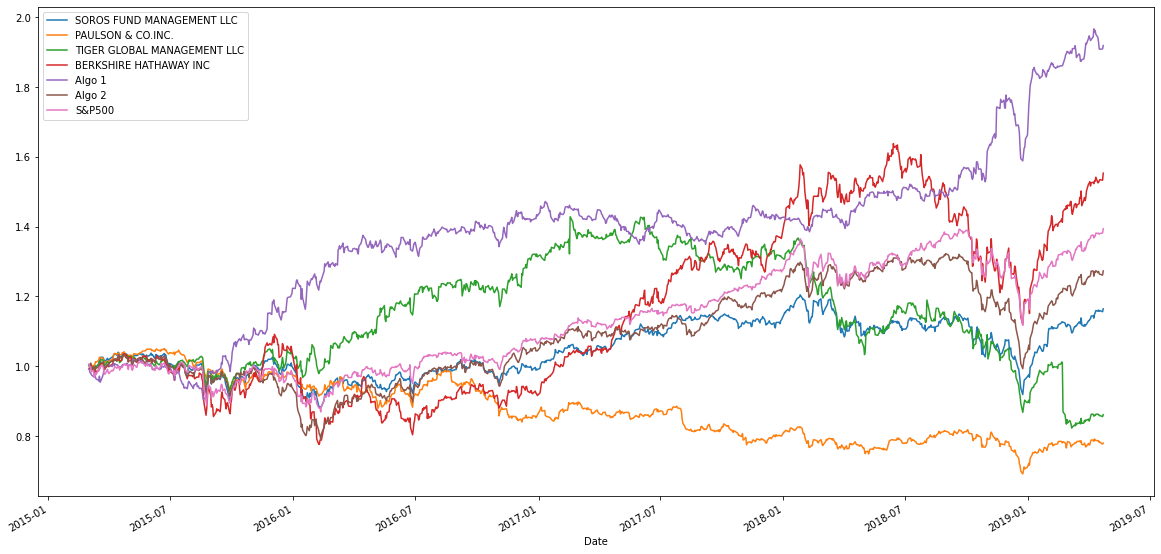

In [20]:
# Calculate cumulative returns of all portfolios
df_cum = (1 + df_combined).cumprod()

# Plot cumulative returns
df_cum.plot(figsize= (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

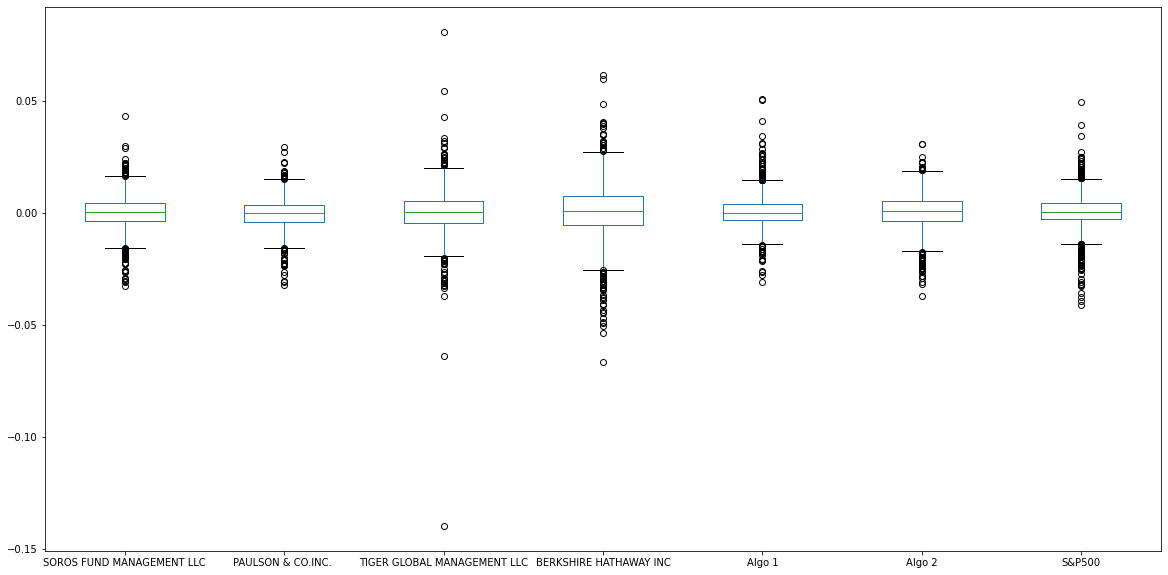

In [21]:
# Box plot to visually show risk
df_combined.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
df_std = df_combined.std()
df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S&P500                         0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
riskier = df_std[df_std > df_std["S&P500"]]
riskier

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
S&P500                         0.135751
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

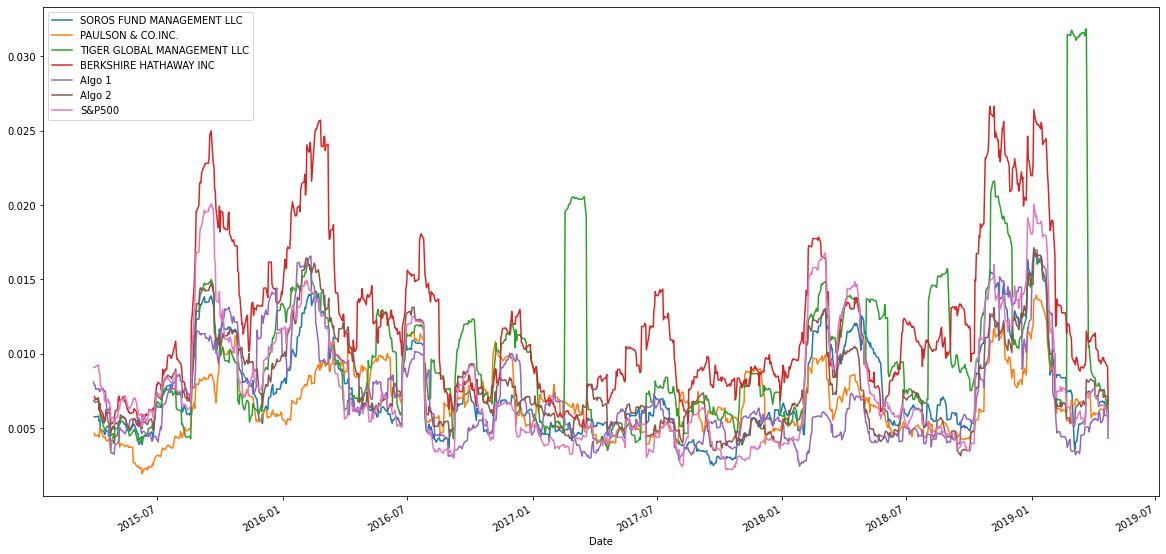

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df_combined.rolling(window=21).std()
# Plot the rolling standard deviation
df_combined.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
corr_df = df_combined.corr()
corr_df.style.background_gradient(cmap="summer")
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
S&P500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 day Beta for Berkshire Hathaway'}, xlabel='Date'>

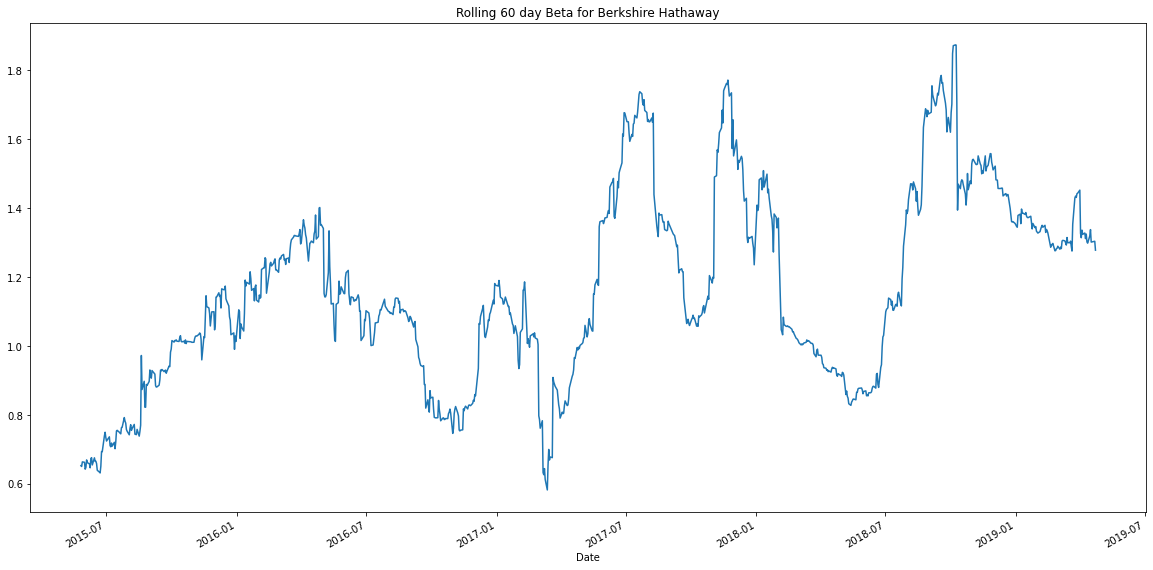

In [28]:
# Calculate covariance of a single portfolio
covariance = df_combined['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_combined['S&P500'])
# Calculate variance of S&P 500
variance = df_combined['S&P500'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10), title='Rolling 60 day Beta for Berkshire Hathaway')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

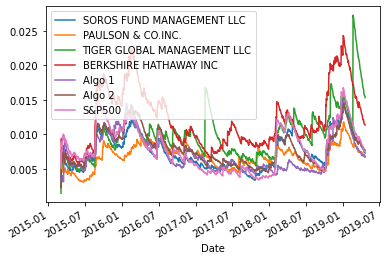

In [29]:
# Use `ewm` to calculate the rolling window
df_combined.ewm(halflife=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
sharpe_ratios = (df_combined.mean() * 252) / (df_combined.std() * np.sqrt(252))
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.506929
BERKSHIRE HATHAWAY INC         0.621810
S&P500                         0.658706
Algo 1                         1.360829
dtype: float64

<AxesSubplot:>

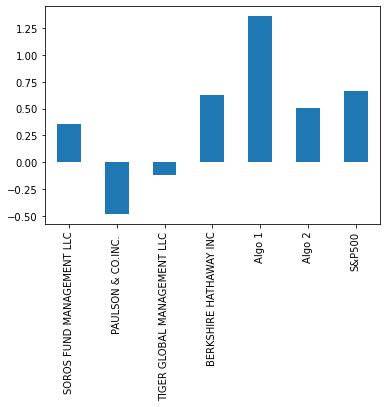

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
print("")

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# ATVI
# CMG
# TSLA

In [64]:
# Reading data from 1st stock
tsla_csv = Path("Resources/TSLA (1).csv")
tsla_data = pd.read_csv(tsla_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_data.sort_index(ascending = True, inplace = True)
tsla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,58.702000,60.164001,58.644001,59.984001,59.984001,23128000
2018-05-02,59.714001,61.369999,59.556000,60.230000,60.230000,44852000
2018-05-03,55.757999,57.608002,55.046001,56.889999,56.889999,86760500
2018-05-04,56.599998,59.372002,55.903999,58.818001,58.818001,42847000
2018-05-07,59.500000,61.192001,59.034000,60.554001,60.554001,43391000


In [65]:
# Reading data from 2nd stock
cmg_csv = Path("Resources/CMG (1).csv")
cmg_data = pd.read_csv(cmg_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
cmg_data.sort_index(ascending = True, inplace = True)
cmg_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-11,422.149994,428.339996,421.720001,424.899994,424.899994,546000
2018-05-14,427.299988,432.829987,423.519989,425.059998,425.059998,824000
2018-05-15,424.739990,431.230011,422.670013,426.559998,426.559998,730900
2018-05-16,429.320007,447.709991,429.320007,444.670013,444.670013,1860700
2018-05-17,444.510010,444.910004,436.089996,438.579987,438.579987,1140900


In [66]:
# Reading data from 3rd stock
atvi_csv = Path("Resources/ATVI (1).csv")
atvi_data = pd.read_csv(atvi_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
atvi_data.sort_index(ascending = True, inplace = True)
atvi_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-01,66.150002,67.989998,65.589996,67.800003,66.498268,4360300
2018-05-02,67.940002,68.889999,67.660004,68.389999,67.076935,7675100
2018-05-03,68.489998,71.029999,64.059998,66.820000,65.537079,22232000
2018-05-04,66.300003,69.919998,66.019997,69.839996,68.499092,11358700
2018-05-07,70.269997,70.730003,69.599998,70.370003,69.018921,5744500


In [67]:
# Combine all stocks in a single DataFrame
new_stocks_combined = pd.concat([atvi_data, cmg_data, tsla_data], axis = "columns",join = "inner")
new_stocks_combined.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2018-05-11,72.769997,72.779999,71.269997,71.699997,70.323380,4996300,422.149994,428.339996,421.720001,424.899994,424.899994,546000,61.540001,61.776001,59.816002,60.212002,60.212002,23398000
2018-05-14,71.870003,72.339996,71.040001,71.699997,70.323380,2964800,427.299988,432.829987,423.519989,425.059998,425.059998,824000,60.664001,60.987999,58.324001,58.394001,58.394001,36434000
2018-05-15,70.980003,71.160004,69.669998,70.169998,68.822762,3896200,424.739990,431.230011,422.670013,426.559998,426.559998,730900,57.001999,57.391998,56.099998,56.835999,56.835999,47596000
2018-05-16,71.129997,71.940002,70.099998,70.330002,68.979691,5029500,429.320007,447.709991,429.320007,444.670013,444.670013,1860700,56.765999,57.762001,56.312000,57.296001,57.296001,28370000
2018-05-17,70.300003,71.900002,70.110001,71.660004,70.284157,6447400,444.510010,444.910004,436.089996,438.579987,438.579987,1140900,57.180000,57.838001,56.793999,56.908001,56.908001,22103000


In [ ]:
# Reset Date index


In [68]:
# Reorganize portfolio data by having a column per symbol
three_stocks = new_stocks_combined.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume']).copy()
three_stocks.head()


,Close,Close,Close
Date,,,
2018-05-11,71.699997,424.899994,60.212002
2018-05-14,71.699997,425.059998,58.394001
2018-05-15,70.169998,426.559998,56.835999
2018-05-16,70.330002,444.670013,57.296001
2018-05-17,71.660004,438.579987,56.908001


In [69]:
three_stocks.columns = ['ATVI', 'CMG', 'TSLA']
three_stocks.head()


,ATVI,CMG,TSLA
Date,,,
2018-05-11,71.699997,424.899994,60.212002
2018-05-14,71.699997,425.059998,58.394001
2018-05-15,70.169998,426.559998,56.835999
2018-05-16,70.330002,444.670013,57.296001
2018-05-17,71.660004,438.579987,56.908001


In [70]:
# Calculate daily returns
three_stocks_returns = three_stocks.pct_change().dropna()
# Drop NAs
three_stocks_returns.head()
# Display sample data


,ATVI,CMG,TSLA
Date,,,
2018-05-14,0.000000,0.000377,-0.030193
2018-05-15,-0.021339,0.003529,-0.026681
2018-05-16,0.002280,0.042456,0.008093
2018-05-17,0.018911,-0.013696,-0.006772
2018-05-18,0.004605,-0.015117,-0.027132


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [71]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
c_portfolio_return = three_stocks_returns.dot(weights)
c_portfolio_return.head()



Date
2018-05-14   -0.009939
2018-05-15   -0.014830
2018-05-16    0.017610
2018-05-17   -0.000519
2018-05-18   -0.012548
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [73]:
# Join your returns DataFrame to the original returns DataFrame
custom_combined = pd.concat([df_combined, three_stocks_returns], axis = "columns",join = "inner")

custom_combined.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,ATVI,CMG,TSLA
Date,,,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000000,0.000377,-0.030193
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.021339,0.003529,-0.026681
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.002280,0.042456,0.008093
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,0.018911,-0.013696,-0.006772
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,0.004605,-0.015117,-0.027132


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [81]:
# Calculate the annualized `std`
all_std = custom_combined.std()
all_std_annual = all_std * np.sqrt(252)
all_std_annual

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P500                         0.152054
ATVI                           0.411199
CMG                            0.316134
TSLA                           0.598042
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

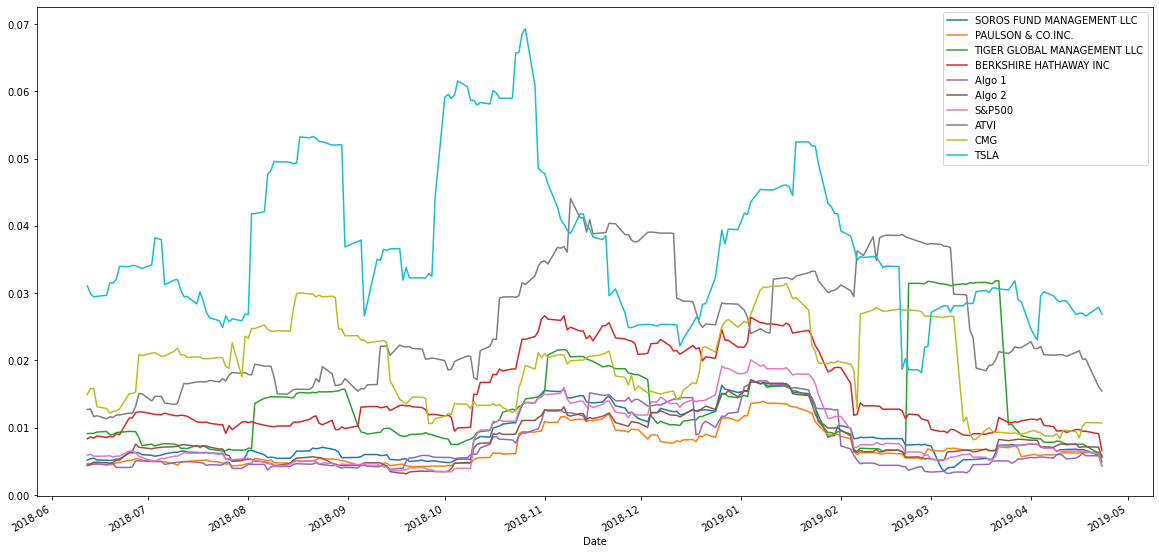

In [83]:
# Calculate rolling standard deviation
custom_combined.rolling(window=21).std()
# Plot rolling standard deviation
custom_combined.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [84]:
# Calculate and plot the correlation
new_corr_df = custom_combined.corr()
new_corr_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,ATVI,CMG,TSLA
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.458458,0.264516,0.281013
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.334723,0.313727,0.213468
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.168999,0.147801,0.132393
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.535313,0.254879,0.358313
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.230922,0.195046,0.077934
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.415394,0.342126,0.270457
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.465897,0.289896,0.328536
ATVI,0.458458,0.334723,0.168999,0.535313,0.230922,0.415394,0.465897,1.000000,0.119141,0.155641
CMG,0.264516,0.313727,0.147801,0.254879,0.195046,0.342126,0.289896,0.119141,1.000000,0.166397
TSLA,0.281013,0.213468,0.132393,0.358313,0.077934,0.270457,0.328536,0.155641,0.166397,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'rolling 60 day beta for Chipotle'}, xlabel='Date'>

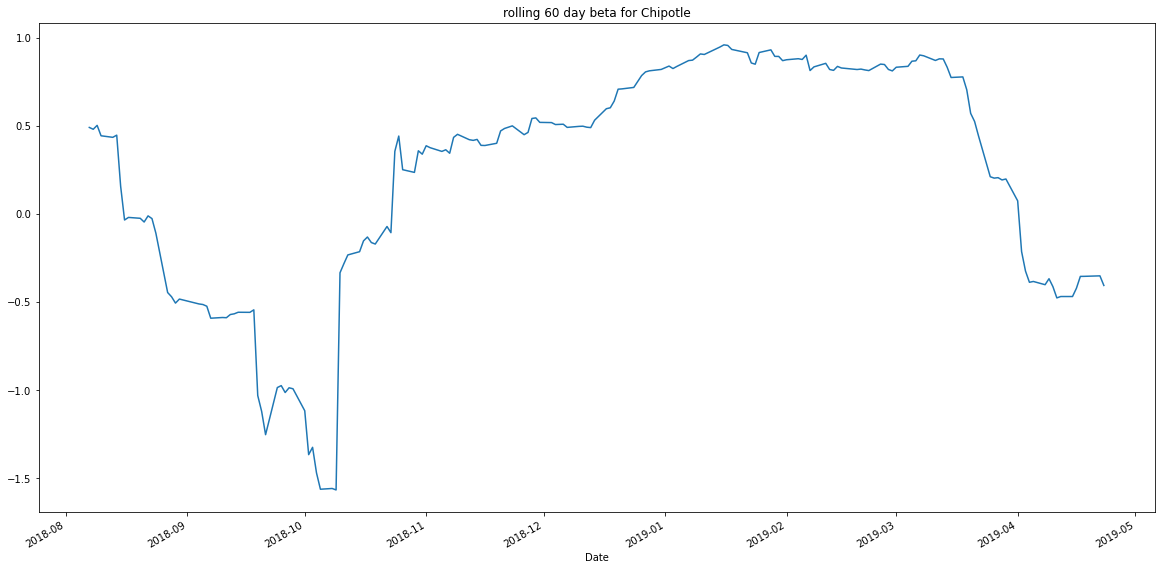

In [87]:
# Calculate and plot Beta
covariance_new = custom_combined['CMG'].rolling(window=60).cov(custom_combined['S&P500'])
variance_new = custom_combined["S&P500"].rolling(window=60).var()
beta_new = covariance_new/variance_new
beta_new.plot(figsize=(20,10), title="rolling 60 day beta for Chipotle")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_1 = (custom_combined.mean() * 252) / (custom_combined.std() * np.sqrt(252))
sharpe_ratios_1.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -1.034216
ATVI                          -0.909408
TSLA                           0.060044
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
S&P500                         0.584820
CMG                            1.848786
Algo 1                         2.035665
dtype: float64

<AxesSubplot:>

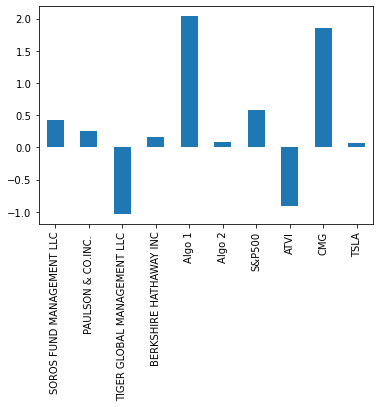

In [90]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_1.plot.bar()

### How does your portfolio do?

Write your answer here!